In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve
from sklearn.ensemble import GradientBoostingClassifier


In [23]:
df = pd.read_csv('./data/final_df.csv')
df.head()

,Unnamed: 0,index,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,...,smoke,snow,squalls,thunderstorm,thunderstorm_with_heavy_rain,thunderstorm_with_light_drizzle,thunderstorm_with_light_rain,thunderstorm_with_rain,very_heavy_rain,outage
0,112,2530,262994507803529216,2012-10-29 15:00:00,no media,False,False,no media,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,113,1296,262996252382343168,2012-10-29 15:00:00,no media,False,False,no media,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,115,1576,262997231647473665,2012-10-29 15:00:00,no media,False,False,no media,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,117,200,262997904233492480,2012-10-29 15:00:00,no media,False,False,no media,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,119,3650,262998371810291713,2012-10-29 15:00:00,no media,False,False,no media,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df.shape

(149, 77)

In [25]:
df.drop(
    columns=['Unnamed: 0', 'geopolitical_ents', 'proper_nouns', 'lemmed_tweet', 'nouns'], 
    inplace=True)



In [26]:
df.columns

Index(['index', 'ID', 'datetime', 'has_media', 'is_reply', 'is_retweet',
       'medias', 'nbr_favorite', 'nbr_reply', 'nbr_retweet', 'text', 'url',
       'user_id', 'usernameTweet', 'regex_clean_tweets', 'aerial_(fly-over)',
       'drills/exercises', 'environmental', 'fire', 'infrastructure',
       'mass_transit_disruption', 'mass_transit_restoration', 'missing_adult',
       'missing_child/adolescent', 'parking', 'public_awareness',
       'public_health', 'road_closure', 'school_notification', 'structural',
       'utility', 'weather', 'temperature_f', 'wind_dir_degrees',
       'wind_speed_mph', 'broken_clouds', 'drizzle', 'dust', 'few_clouds',
       'fog', 'freezing_rain', 'haze', 'heavy_intensity_drizzle',
       'heavy_intensity_rain', 'heavy_snow', 'heavy_thunderstorm',
       'light_intensity_drizzle', 'light_intensity_shower_rain', 'light_rain',
       'light_rain_and_snow', 'light_snow', 'mist', 'moderate_rain',
       'overcast_clouds', 'proximity_thunderstorm',
       

In [33]:
df.shape

(149, 72)

In [38]:
features = df.columns[15:71]

In [39]:
features

Index(['aerial_(fly-over)', 'drills/exercises', 'environmental', 'fire',
       'infrastructure', 'mass_transit_disruption', 'mass_transit_restoration',
       'missing_adult', 'missing_child/adolescent', 'parking',
       'public_awareness', 'public_health', 'road_closure',
       'school_notification', 'structural', 'utility', 'weather',
       'temperature_f', 'wind_dir_degrees', 'wind_speed_mph', 'broken_clouds',
       'drizzle', 'dust', 'few_clouds', 'fog', 'freezing_rain', 'haze',
       'heavy_intensity_drizzle', 'heavy_intensity_rain', 'heavy_snow',
       'heavy_thunderstorm', 'light_intensity_drizzle',
       'light_intensity_shower_rain', 'light_rain', 'light_rain_and_snow',
       'light_snow', 'mist', 'moderate_rain', 'overcast_clouds',
       'proximity_thunderstorm', 'proximity_thunderstorm_with_drizzle',
       'proximity_thunderstorm_with_rain', 'sand', 'sand/dust_whirls',
       'scattered_clouds', 'shower_rain', 'sky_is_clear', 'smoke', 'snow',
       'squalls', 'th

In [41]:
X = df['regex_clean_tweets']
y = df['outage']

## Baseline Score

In [42]:
y.value_counts(normalize=True)

0.0    0.731544
1.0    0.268456
Name: outage, dtype: float64

## Model with only Text Data

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc
from sklearn.model_selection import GridSearchCV
 


In [62]:
def classifier(X, y):
   
    
    pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('clf', MultinomialNB())
    ])
    
    pipe_params = {
    'tvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tvec__max_features': [None, 500, 1000],
    'tvec__min_df': [1, 2, 3],
    'tvec__max_df': [1.0, 0.8, 0.6],
    'clf__alpha': [1.0, 0.1, 0.01]
    }
    
    gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
    
    gs.fit(X, y)
    
    print(f'The Accuracy score is: {round(gs.score(X, y), 2)}')

    print(gs.best_params_)
    print(f'The cross_val_score is: {round(gs.best_score_, 2)}')
    #y_predpr_lr = gs.best_estimator_.predict_proba(X_test)[:, 1]
    
    tn, fp, fn, tp = confusion_matrix(y, gs.best_estimator_.predict(X)).ravel()

    

    accuracy = round((tn + tp) / (tn + fp + fn + tp), 2)
    misclassification = round((1 - accuracy), 2)
    sensitivity = round((tp) / (tp + fn), 2)
    specificity = round((tn) / (tn + fp), 2)
    precision = round((tp) / (tp + fp), 2)
    
    print(f'The Accuracy is: {accuracy}')
    print(f'The Missclassification Rate is: {misclassification}')
    print(f'The Sensitivity/Recall is: {sensitivity}')
    print(f'The Specificity is: {specificity}')
    print(f'The Precision is: {precision}')
    

    fpr_clf, tpr_clf, _ = roc_curve(y, gs.best_estimator_.predict_proba(X)[:, 1])
    roc_auc_clf = auc(fpr_clf, tpr_clf)

    plt.figure(figsize = (10, 7))
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_clf, tpr_clf, lw=3, label='The Naive Bayes ROC curve (area = {:0.2f})'.format(roc_auc_clf))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve (Reddit Data)', fontsize=18)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

    print(classification_report(y, gs.best_estimator_.predict(X)))
    

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The Accuracy score is: 0.95
{'clf__alpha': 0.1, 'tvec__max_df': 0.8, 'tvec__max_features': 500, 'tvec__min_df': 1, 'tvec__ngram_range': (1, 3)}
The cross_val_score is: 0.77
The Accuracy is: 0.95
The Missclassification Rate is: 0.05
The Sensitivity/Recall is: 0.92
The Specificity is: 0.96
The Precision is: 0.9
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       109
         1.0       0.90      0.93      0.91        40

   micro avg       0.95      0.95      0.95       149
   macro avg       0.94      0.94      0.94       149
weighted avg       0.95      0.95      0.95       149



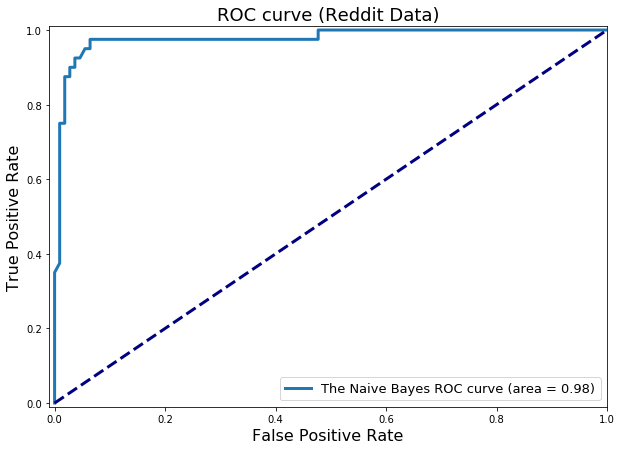

In [63]:
classifier(X, y)

## PCA

In [64]:
features

Index(['aerial_(fly-over)', 'drills/exercises', 'environmental', 'fire',
       'infrastructure', 'mass_transit_disruption', 'mass_transit_restoration',
       'missing_adult', 'missing_child/adolescent', 'parking',
       'public_awareness', 'public_health', 'road_closure',
       'school_notification', 'structural', 'utility', 'weather',
       'temperature_f', 'wind_dir_degrees', 'wind_speed_mph', 'broken_clouds',
       'drizzle', 'dust', 'few_clouds', 'fog', 'freezing_rain', 'haze',
       'heavy_intensity_drizzle', 'heavy_intensity_rain', 'heavy_snow',
       'heavy_thunderstorm', 'light_intensity_drizzle',
       'light_intensity_shower_rain', 'light_rain', 'light_rain_and_snow',
       'light_snow', 'mist', 'moderate_rain', 'overcast_clouds',
       'proximity_thunderstorm', 'proximity_thunderstorm_with_drizzle',
       'proximity_thunderstorm_with_rain', 'sand', 'sand/dust_whirls',
       'scattered_clouds', 'shower_rain', 'sky_is_clear', 'smoke', 'snow',
       'squalls', 'th

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [66]:
X_pca = df[features]

In [68]:
ss = StandardScaler()
X_t = ss.fit_transform(X_pca)

In [119]:
pca = PCA()

In [120]:
pca.fit(X_t)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [121]:
Z = pca.transform(X_t)

In [122]:
pd.DataFrame(Z).describe()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
count,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,...,149.0,149.0,149.0,149.0,149.0,149.0,149.0,149.0,1.490000e+02,1.490000e+02
mean,2.205544e-16,-5.066790e-16,1.318856e-16,1.341209e-16,4.768743e-17,7.451161e-18,-6.109952e-17,9.984556e-17,4.023627e-17,3.278511e-17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.654856e-20,4.336059e-19
std,1.712523e+00,1.553009e+00,1.441722e+00,1.354563e+00,1.339708e+00,1.250513e+00,1.162122e+00,1.140706e+00,1.113401e+00,1.059329e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.989385e-16,5.605775e-16
min,-2.229655e+00,-3.086826e+00,-2.761394e+00,-3.186571e+00,-1.926462e+00,-3.006435e+00,-2.564769e+00,-3.116329e+00,-4.804781e+00,-4.406465e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.705638e-15,-1.050884e-15
25%,-2.142864e+00,-5.459422e-01,-7.740086e-01,-4.622085e-01,-3.157589e-01,-1.896265e-01,-3.011363e-01,-3.359611e-01,-2.563071e-01,-1.905451e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.283807e-16,-2.945447e-16
50%,4.913730e-01,4.055750e-01,-3.575188e-01,-4.239090e-01,-2.181710e-02,-1.234680e-01,-3.013128e-02,-1.863002e-01,-1.812564e-01,-9.424101e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.034034e-16,-9.982202e-17
75%,1.021636e+00,6.931697e-01,3.138721e-02,2.871803e-01,-9.809118e-03,5.594036e-01,9.780457e-02,3.934879e-01,1.648605e-01,2.481522e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.527517e-16,3.852217e-17
max,3.379888e+00,4.285268e+00,3.744251e+00,3.870118e+00,9.403244e+00,8.678323e+00,7.297932e+00,4.628117e+00,6.089916e+00,8.462318e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.066410e-15,2.751769e-15


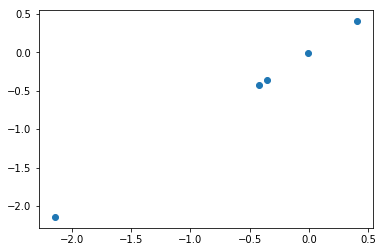

In [93]:
plt.scatter(pd.DataFrame(Z[0]),
            pd.DataFrame(Z[1]));

In [75]:
pca.explained_variance_

array([2.93273560e+00, 2.41183615e+00, 2.07856165e+00, 1.83484014e+00,
       1.79481789e+00, 1.56378285e+00, 1.35052788e+00, 1.30120940e+00,
       1.23966113e+00, 1.12217777e+00, 1.09159030e+00, 1.02523179e+00,
       1.02075870e+00, 1.01448385e+00, 9.63453322e-01, 8.71989549e-01,
       8.40469246e-01, 7.58497970e-01, 5.85657603e-01, 3.85121808e-01,
       3.20684706e-01, 2.80214563e-01, 2.12503414e-01, 1.23897377e-01,
       5.77277770e-02, 1.99854095e-31, 1.43294287e-31, 4.48493290e-32,
       2.92274217e-32, 1.34373580e-32, 1.34373580e-32, 1.34373580e-32,
       1.34373580e-32, 1.34373580e-32, 1.34373580e-32, 1.34373580e-32,
       1.34373580e-32, 1.34373580e-32, 1.34373580e-32, 1.34373580e-32,
       1.34373580e-32, 1.34373580e-32, 1.34373580e-32, 1.34373580e-32,
       1.34373580e-32, 1.34373580e-32, 1.34373580e-32, 1.34373580e-32,
       1.34373580e-32, 1.34373580e-32, 1.34373580e-32, 1.34373580e-32,
       1.34373580e-32, 1.34373580e-32, 4.97123354e-33, 2.67414964e-33])

In [86]:
var_exp = pca.explained_variance_ratio_

In [87]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.10789084, 0.1966186 , 0.27308569, 0.34058665, 0.40661525,
       0.46414442, 0.51382827, 0.56169777, 0.607303  , 0.6485862 ,
       0.68874413, 0.72646083, 0.76401298, 0.80133429, 0.83677826,
       0.86885741, 0.89977699, 0.92768097, 0.94922641, 0.96339445,
       0.97519195, 0.98550061, 0.99331829, 0.99787628, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

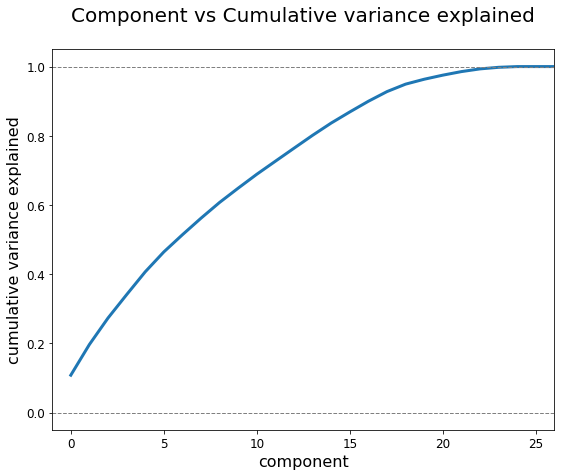

In [88]:
plt.figure(figsize=(9,7))

# Plot the cumulative explained variance
component_number = range(len(cum_var_exp))
plt.plot(component_number, cum_var_exp, lw=3)

# Add horizontal lines at y=0 and y=100
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the x and y axis limits
ax = plt.gca()
ax.set_xlim([-1,26])
ax.set_ylim([-0.05,1.05])

# Label the axes
ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

# Make the tick labels bigger
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
# Add title
ax.set_title('Component vs Cumulative variance explained\n', fontsize=20)

plt.show()

In [123]:
pca = PCA(n_components=5)

In [124]:
pca.fit(X_t)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [125]:
Z = pca.transform(X_t)

In [132]:
pd.DataFrame(Z).describe()

,0,1,2,3,4
count,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02
mean,2.235348e-16,-5.081692e-16,1.333758e-16,1.341209e-16,4.768743e-17
std,1.712523e+00,1.553009e+00,1.441722e+00,1.354563e+00,1.339708e+00
min,-2.229655e+00,-3.086826e+00,-2.761394e+00,-3.186571e+00,-1.926462e+00
25%,-2.142864e+00,-5.459422e-01,-7.740086e-01,-4.622085e-01,-3.157589e-01
50%,4.913730e-01,4.055750e-01,-3.575188e-01,-4.239090e-01,-2.181710e-02
75%,1.021636e+00,6.931697e-01,3.138721e-02,2.871803e-01,-9.809118e-03
max,3.379888e+00,4.285268e+00,3.744251e+00,3.870118e+00,9.403244e+00


In [133]:
pd.DataFrame(Z).shape

(149, 5)